<a href="https://colab.research.google.com/github/vinitjethwa369/Data-Analysis-of-Hotel-Booking/blob/main/Data_Analysis_of_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each
hotel is now dealing with a number of issues as a result, including fewer revenues and
less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels'
primary goal in order to increase their efficiency in generating revenue, and for us to
offer thorough business advice to address this problem.



The analysis of hotel booking cancellations as well as other factors that have no bearing
on their business and yearly revenue generation are the main topics of this report.

# **Assumptions**

1. No unusual occurrences (outliers) between 2015 and 2017 will have a substantial impact on
the data used.
2. The information is still current and can be used to analyze a hotel's possible plans in
an efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking
cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.


# Research Question

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

# Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their
eservations,

# 1.Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#2. Loading the data set

In [21]:
df = pd.read_csv("/content/hotel_bookings 2.csv")

#3. Exploratory Data Analysis & Data Cleaning


In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [23]:
df.shape

(119390, 32)

In [24]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
# we need to study the  reservation_status_date   but it is in the object from so we need tòconvert it into the date,time column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [27]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [28]:
df.describe(include = object) # include object will only describe teh data which is in object type

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [29]:
for col in df.describe(include = object):
  print(col)
  print(df[col].unique())
  print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [30]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
df.drop(['company','agent'], axis = 1 , inplace = True)
df.dropna(inplace = True)

In [32]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

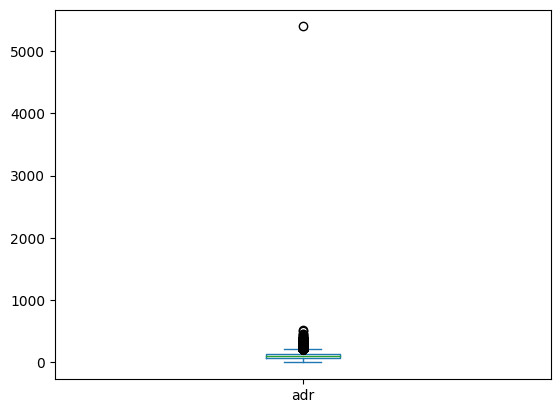

In [33]:
df['adr'].plot(kind= 'box')

In [34]:
df = df[df['adr']<50] #removing the outlier

<Axes: >

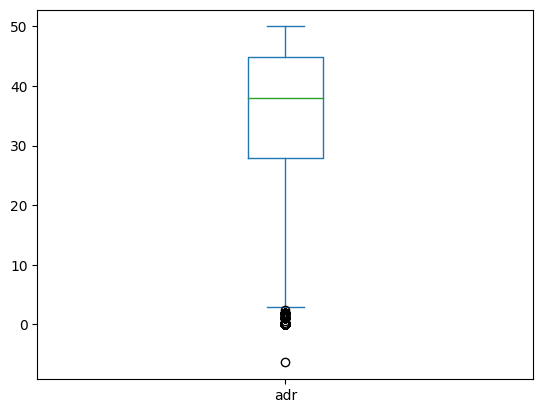

In [35]:
df['adr'].plot(kind= 'box')

# Data Analysis and Visualization

In [36]:
cancelled_perc = df['is_canceled'].value_counts(normalize= True)
cancelled_perc # 1 = canceled , 0= not cancelled


0    0.787104
1    0.212896
Name: is_canceled, dtype: float64

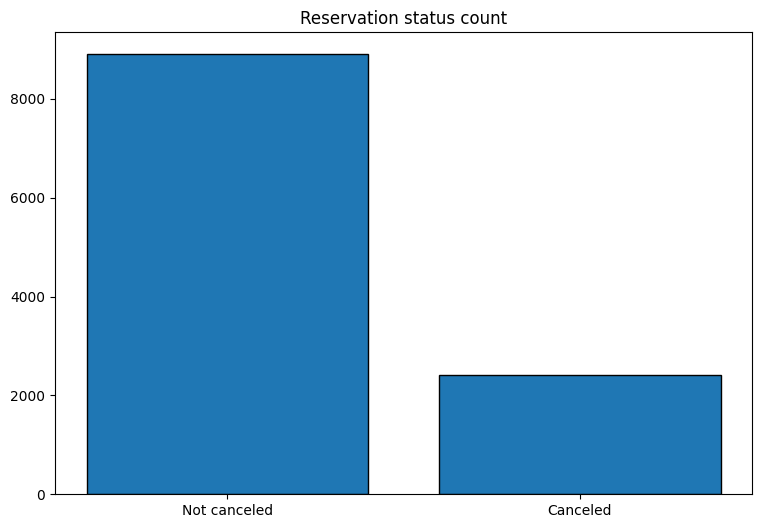

In [37]:
plt. figure (figsize=(9,6))
plt. title( 'Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor='k')
plt.show()

The accompanying bar graph shows the percentage of reservations that are canceled
and those that are not. It is obvious that there are still a significant number of
reservations that have not been canceled. There are still 27% of clients who canceled
their reservation, which has a significant impact on the hotels' earnings.

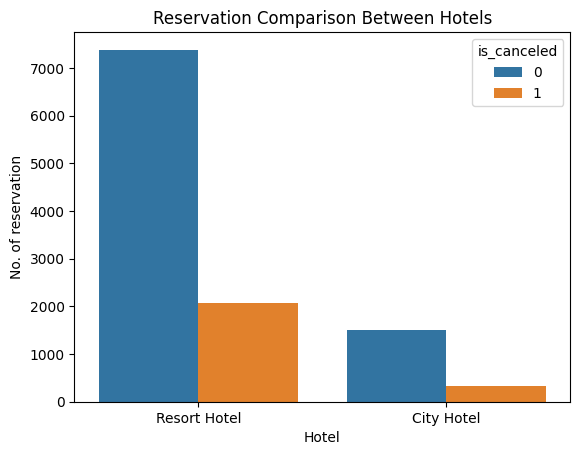

In [89]:
data = pd.DataFrame(df)

# Create count plot with hue parameter
sns.countplot(x="hotel", hue="is_canceled", data=df)

# Show plot
plt.title('Reservation Comparison Between Hotels')
plt.xlabel('Hotel')
plt.ylabel('No. of reservation')
plt.show()

# 0 not cancelled , 1 cancelled

In comparison to City hotels, Resort hotels have more bookings. It's possible that City hotels are more expensive than those in cities.

In [39]:
resort_hotel = data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

# 0 not cancelled , 1 cancelled

0    0.78121
1    0.21879
Name: is_canceled, dtype: float64

In [41]:
city_hotel = data[data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

# 0 not cancelled , 1 cancelled

0    0.817152
1    0.182848
Name: is_canceled, dtype: float64

In [42]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
# print('resort_hotel', resort_hotel)
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
# print('City HOtel', city_hotel)

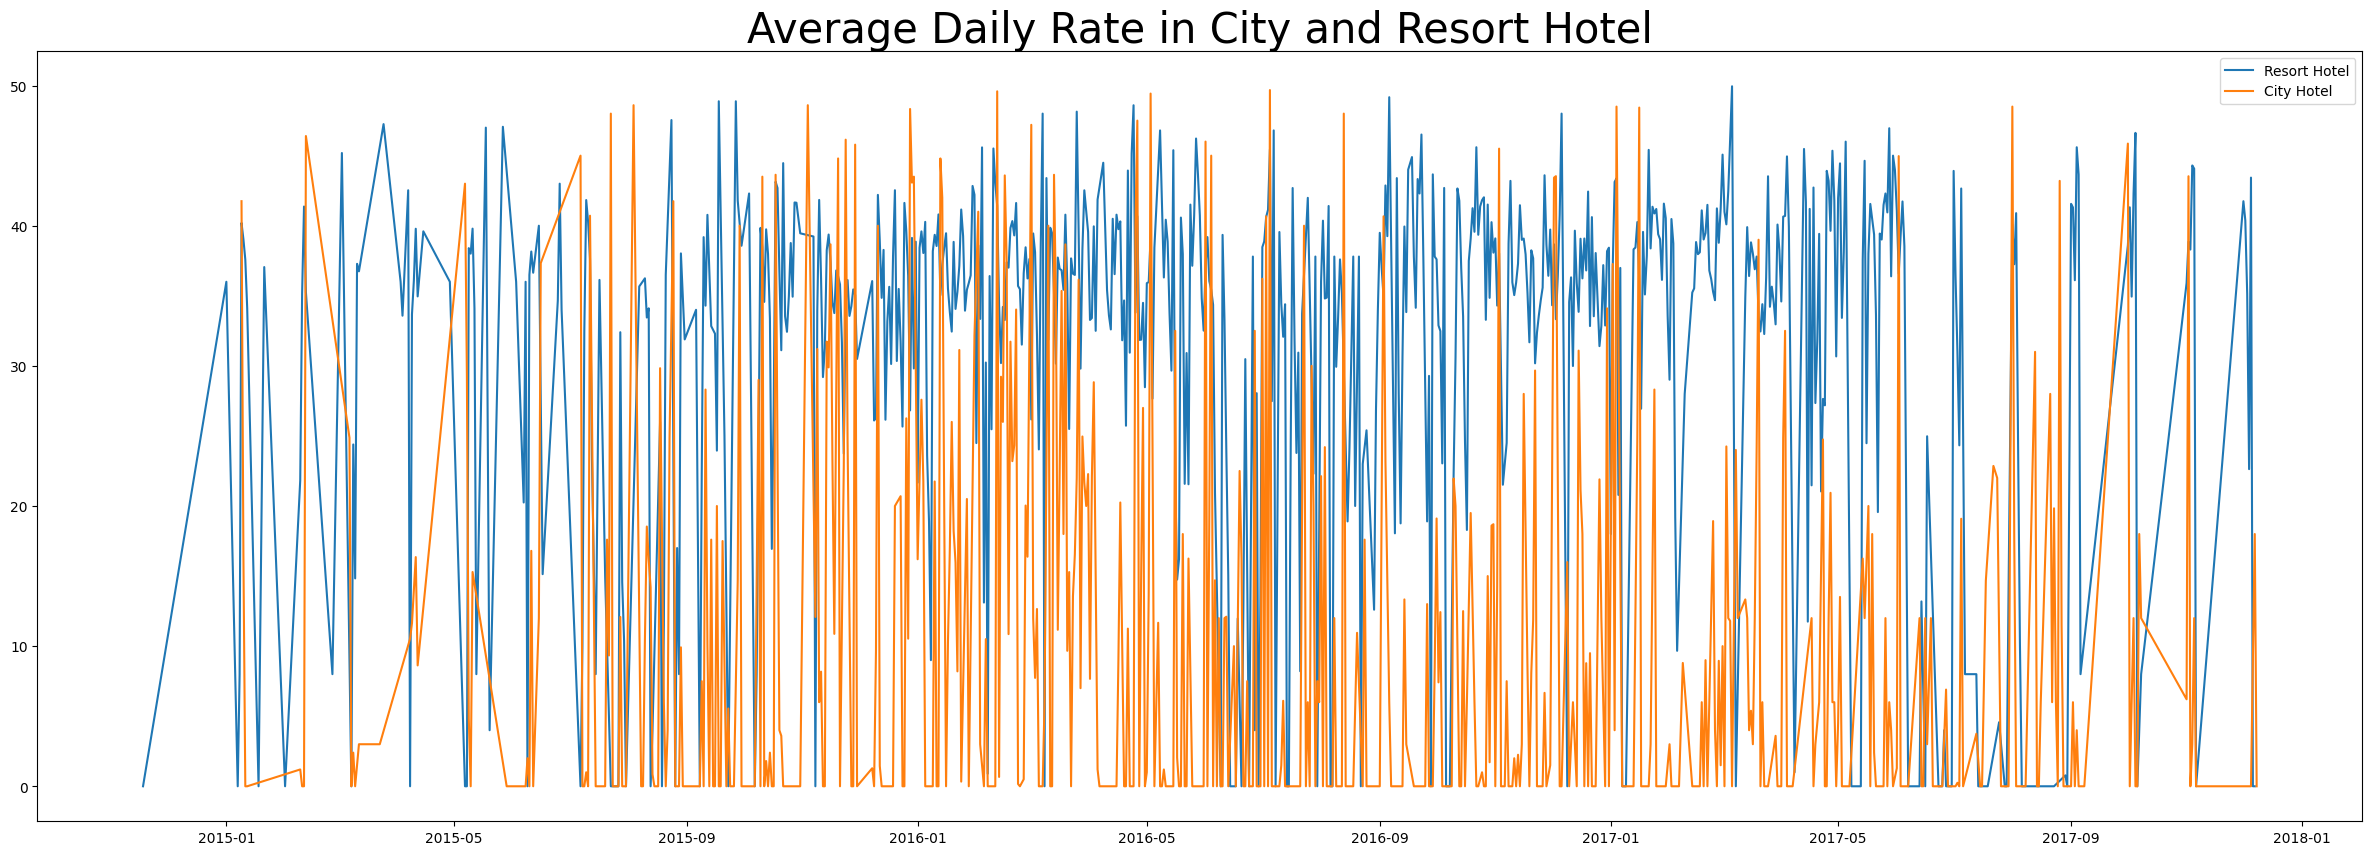

In [49]:
#Average Daily Rate in City and Resort Hotel

plt.figure(figsize = (30, 10))
plt.title( 'Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot( resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot( city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=10)
plt.show()

The line graph above shows that, on certain days, the average daily rate for a city hotel
is less than that of a resort hotel, and on other days, it is even less. It goes without
saying that weekends and holidays may see a rise in resort hotel rates.

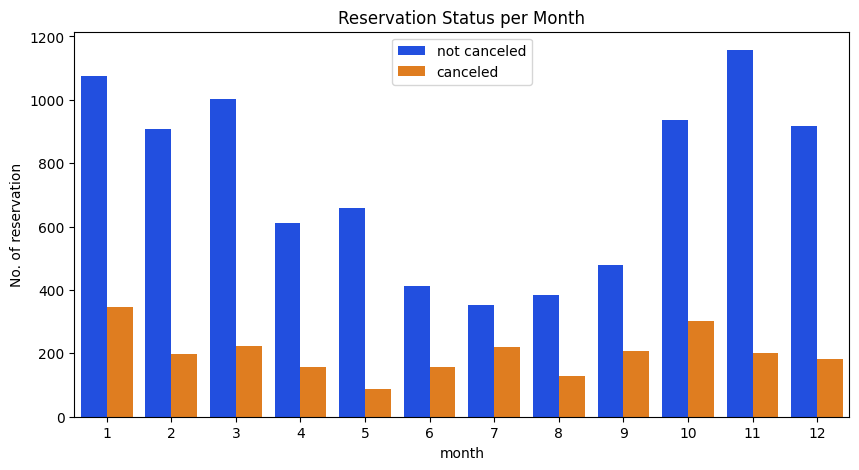

In [73]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (10, 5))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Reservation Status per Month')
plt.xlabel('month')
plt.ylabel('No. of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

We have developed the grouped bar graph to analyze the months with the highest and
lowest reservation levels according to reservation status. As can be seen, both the
number of confirmed reservations are largest in November. whereas January is the month with the most canceled
reservations.

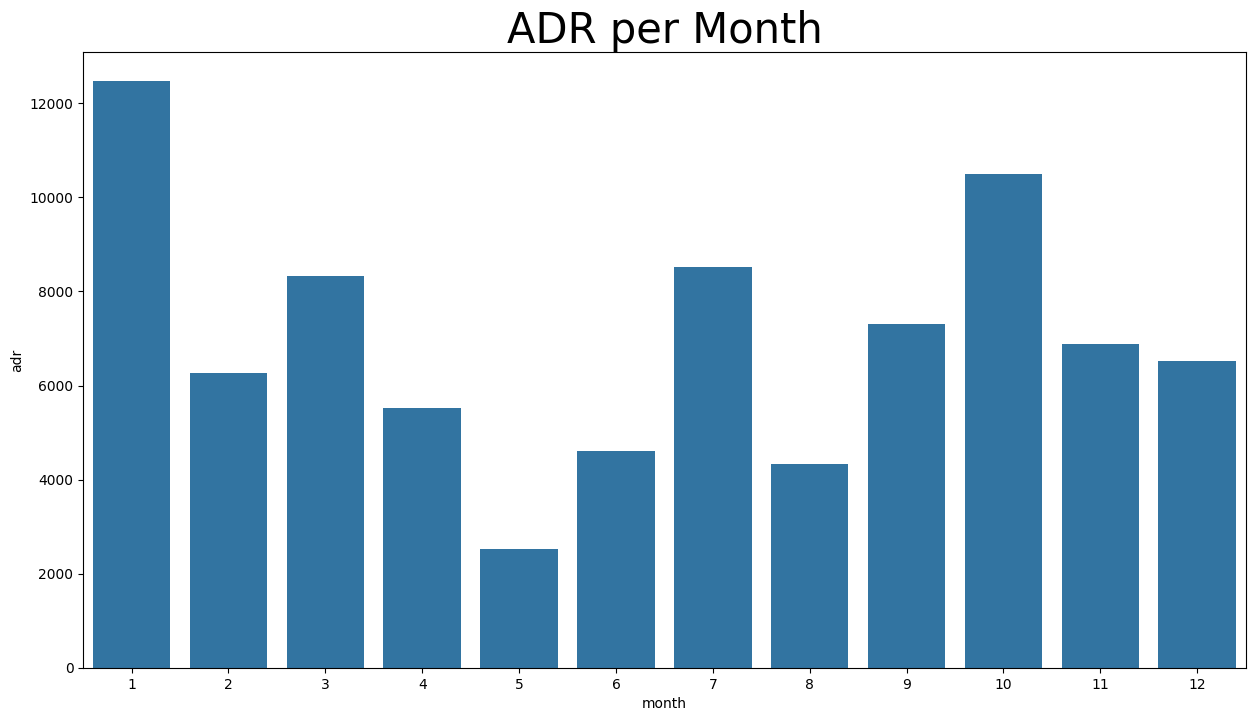

In [92]:
# price per month
# plt.figure(figsize=(30, 10))
# plt.title('ADR per Month', fontsize=30)
# sns.barplot('month', 'adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
# plt.show()

grouped_df = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
plt.figure(figsize=(15, 8))
plt.title('ADR per Month', fontsize=30)
sns.barplot(x='month', y='adr', data=grouped_df)
plt.show()


This bar graph demonstrates that cancellations are most common when prices are
greatest and are least common when they are lowest. Therefore, the cost of the
accommodation is solely responsible for the cancellation.
Now, let's see which country has the highest reservation canceled. The top country is
Portugal with the highest number of cancellations.

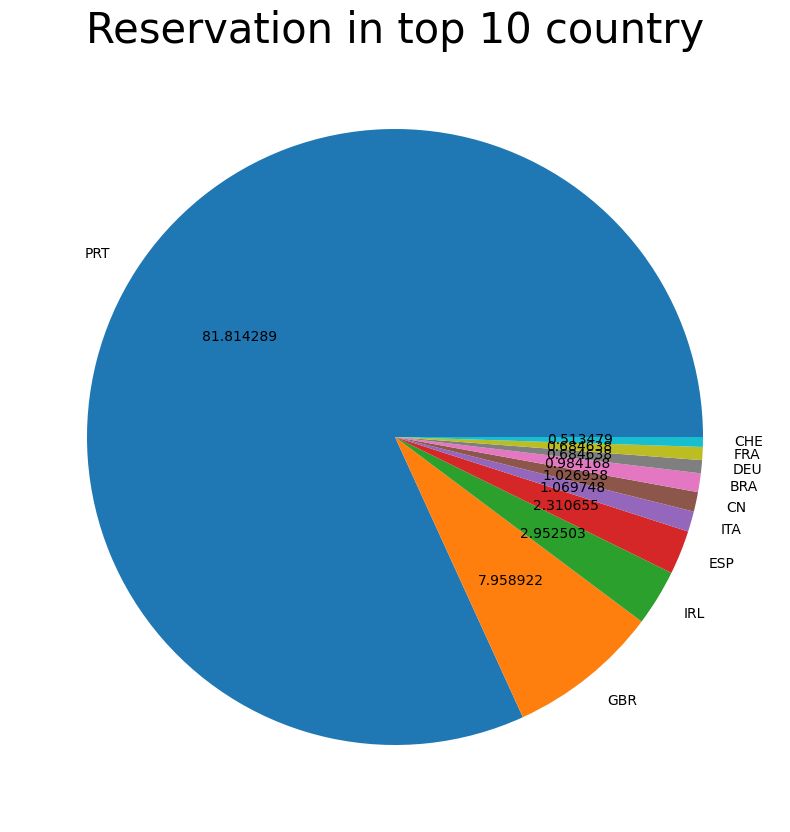

In [81]:
# most Cancellation rate in top 10 countries

from collections import Counter
country_counts = Counter(cancelled_data['country'])
top_10_countries = country_counts.most_common(10)

plt.figure(figsize=(10, 10))
plt.title('Reservation in top 10 country', fontsize=30)
plt.pie([country[1] for country in top_10_countries],autopct= '%2f',labels=[country[0] for country in top_10_countries])
plt.show()

Let's check the area from where guests are visiting the hotels and making reservations.Is it coming from Direct or Groups, Online or Offline Travel Agents? Around 27% of the
clients come from online travel agencies, whereas 16% come from groups. Only 11% of
clients book hotels directly by visiting them and making reservations.

In [83]:
# by which mode more customer is coming like offline booking or online booking etc

df['market_segment'].value_counts()

Online TA        3150
Offline TA/TO    2817
Groups           1826
Corporate        1465
Direct           1330
Complementary     712
Aviation            6
Name: market_segment, dtype: int64

In [86]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.278613
Offline TA/TO    0.249160
Groups           0.161507
Corporate        0.129577
Direct           0.117637
Complementary    0.062975
Aviation         0.000531
Name: market_segment, dtype: float64

In [88]:
# hich segment has more cancellation
cancelled_data['market_segment'].value_counts(normalize = True)

Groups           0.327378
Online TA        0.316577
Offline TA/TO    0.176153
Corporate        0.078521
Direct           0.063980
Complementary    0.036975
Aviation         0.000415
Name: market_segment, dtype: float64

# **Suggesstion**

1. Cancellation rates rise as the price does. In order to prevent cancellations of
reservations, hotels could work on their pricing strategies and try to lower the
rates for specific hotels based on locations. They can also provide some
discounts to the consumers.
2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in
the resort hotel than the city hotels. So the hotels should provide a reasonable
discount on the room prices on weekends or on holidays.
3. In the month of January, hotels can start campaigns or marketing with a
reasonable amount to increase their revenue as the cancellation is the highest in
this month.
4. They can also increase the quality of their hotels and their services mainly in
Portugal to reduce the cancellation rate.